<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/MGD1_Make_Circles_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_biclusters, make_friedman1, make_s_curve, make_classification, make_hastie_10_2
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

**EJERCICIO EN CLASE:**
Elegir 6 generacidores, y probar 3 sistemas en c/u

*   N_samples=100
*   Ruido / Desviacion estandar = empezar con pequeña y aumentar progresivamente
Generar matrices de resultado para comparar

In [3]:
#Tomaré: make_circles, make_biclusters, make_friedman1, make_s_curve, make_classification, make_hastie_10_2

**CASO 1: make_circles   /    RUIDO=0.05**

In [4]:
#CASO 1:    
#X= Es la matriz n multidimensional con las coordenadas
#y= Es la clase a la que pertenece el elemento
Xcircle, ycircle = make_circles(n_samples=100, noise=0.05)

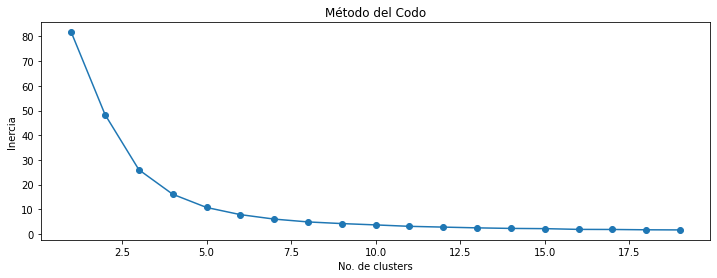

In [19]:
#SISTEMA KMEANS:
#PASO 1: Calcular valor óptimo de K (Número de clusters)
#Esto se hace con el método de codo, que mide qué tan similares son los individuos dentro de los clusters
#Creará diferentes cantidades de clusters y calculará qué tan similares son los individuos dentro del cluster e ir plasmando esto en una gráfica:
#Mientras más similares sean estos, más distantes serán los clusters. Ese es el ideal: clusters bien separados
#Inercia/WCSS: Sum of squared distance between each point and the centroid in a cluster (How far are the points inside of the cluster)

wcss = []

for i in range (1,20):
  algoritmo_kmeans=KMeans(n_clusters=i, max_iter=100, n_init=10)
  algoritmo_kmeans.fit(Xcircle)
  wcss.append(algoritmo_kmeans.inertia_)

plt.figure(figsize=[12,4])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), wcss, marker='o')
plt.show()

De acuerdo a la imagen, el # de clúster óptimo (PARA KMeans) es 2


PRIMERA PREDICCIÓN K-MEANS. LOS PARÁMETROS SON:
init= k-means++      n_clusters=[2,6)       max_iter=100            n_init=[4,11)  
----
En la esquina superior izquierda verá el original
Cada fila muestra el número de clusters
Las gráficas hacia la derecha aumentan el número de veces que el sistema se ejecuta con diferentes centroides
----



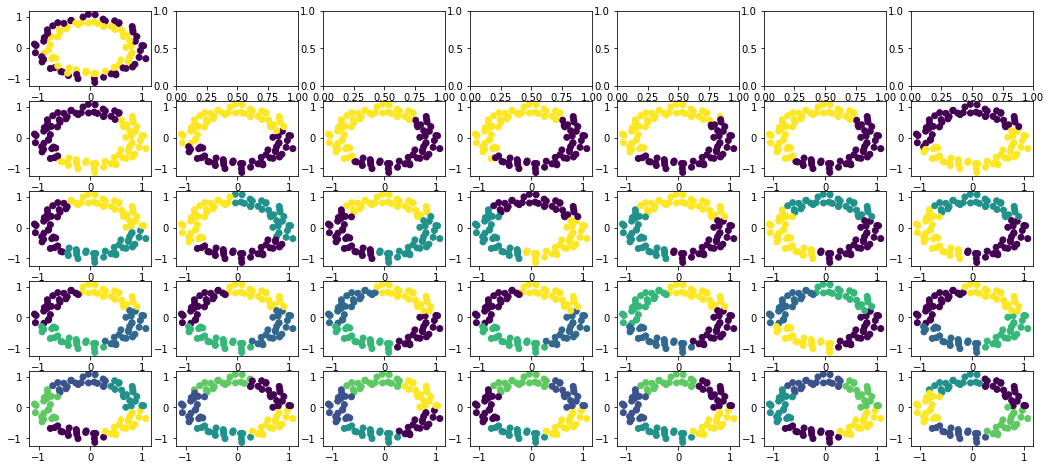

In [39]:
#PRIMERA PREDICCIÓN KMEAN---------------------------------------------------
#KMeans = Numero de clústers
#init="k-means++"
#n_init= Es el numero de veces que el sistema se ejecutará con diferentes centroides

print("PRIMERA PREDICCIÓN K-MEANS. LOS PARÁMETROS SON:")
print("init= k-means++      n_clusters=[2,6)       max_iter=100            n_init=[4,11)  ")
print("----")
print("En la esquina superior izquierda verá el original")
print("Cada fila muestra el número de clusters")
print("Las gráficas hacia la derecha aumentan el número de veces que el sistema se ejecuta con diferentes centroides")
print("----")
print("")

fig,axs = plt.subplots(5,7, figsize = (18,8))  #[i filas, j columnas]
axs[0][0].scatter(Xcircle[:,0],Xcircle[:,1],c = ycircle)

for i in range(2,6):
  for j in range(4,11):
    kmcircle = KMeans(n_clusters=i, init="k-means++", max_iter=100, n_init=j)
    #Ahora verificaremos los datos en el sistema creado
    km_tcircle = kmcircle.fit_predict(Xcircle)
    #resultados.append(km_tcircle)
    axs[i-1][j-4].scatter(Xcircle[:,0],Xcircle[:,1],c = km_tcircle)


SEGUNDA PREDICCIÓN K-MEANS. LOS PARÁMETROS SON:
init= random      n_clusters=[2,6)       max_iter=100            n_init=[4,11)  
----
En la esquina superior izquierda verá el original
Cada fila muestra el número de clusters
Las gráficas hacia la derecha aumentan el número de veces que el sistema se ejecuta con diferentes centroides
----



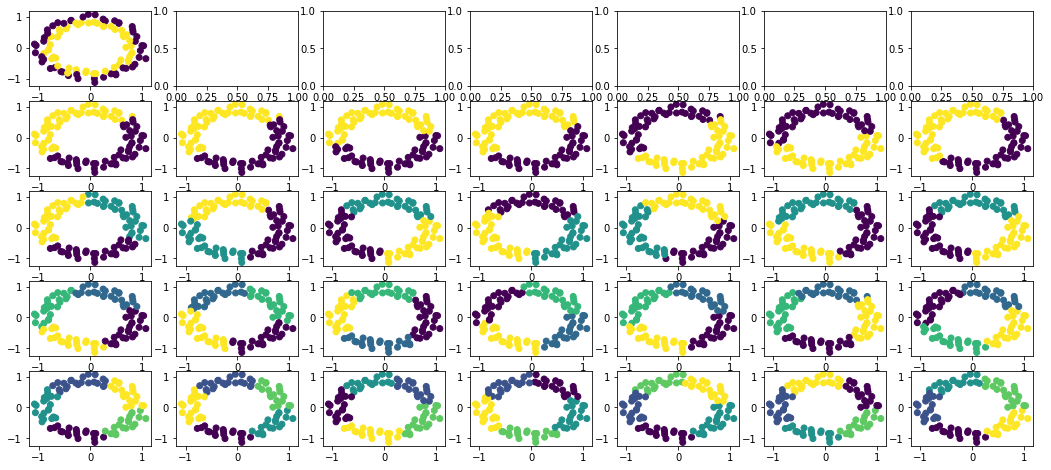

In [40]:
#SEGUNDA PREDICCIÓN KMEANS---------------------------------------------------
#KMeans = Numero de clústers
#init="random"
#n_init= Es el numero de veces que el sistema se ejecutará con diferentes centroides

print("SEGUNDA PREDICCIÓN K-MEANS. LOS PARÁMETROS SON:")
print("init= random      n_clusters=[2,6)       max_iter=100            n_init=[4,11)  ")
print("----")
print("En la esquina superior izquierda verá el original")
print("Cada fila muestra el número de clusters")
print("Las gráficas hacia la derecha aumentan el número de veces que el sistema se ejecuta con diferentes centroides")
print("----")
print("")


fig,axs = plt.subplots(5,7, figsize = (18,8))  #[i filas, j columnas]
axs[0][0].scatter(Xcircle[:,0],Xcircle[:,1],c = ycircle)

for i in range(2,6):
  for j in range(4,11):
    kmcircle = KMeans(n_clusters=i, init="random", max_iter=100, n_init=j)
    #Ahora verificaremos los datos en el sistema creado
    km_tcircle = kmcircle.fit_predict(Xcircle)
    #resultados.append(km_tcircle)
    axs[i-1][j-4].scatter(Xcircle[:,0],Xcircle[:,1],c = km_tcircle)


**AGRUPAMIENTO JERÁRQUICO**

In [24]:
#class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None,
#                                             compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

#Obtenido el número de cluster se procede a definir los clústeres
from sklearn.cluster import AgglomerativeClustering

#affinity puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
#If linkage is “ward”, only “euclidean” is accepted. 
#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method

#connectivity:  array-like or callable, default=None
#Default is None, i.e, the hierarchical clustering algorithm is unstructured.

#Compute_full_tree‘auto’ or bool, default=’auto’
#This option is useful only when specifying a connectivity matrix. 
#By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or 
#that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False.

#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
#‘ward’ minimizes the variance of the clusters being merged.
#‘average’ uses the average of the distances of each observation of the two sets.
#‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#‘single’ uses the minimum of the distances between all observations of the two sets

#distance_threshold:  float, default=None 
#The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True

#compute_distances:  bool, default=False
#Computes distances between clusters even if distance_threshold is not used. 
#This can be used to make dendrogram visualization, but introduces a computational and memory overhead

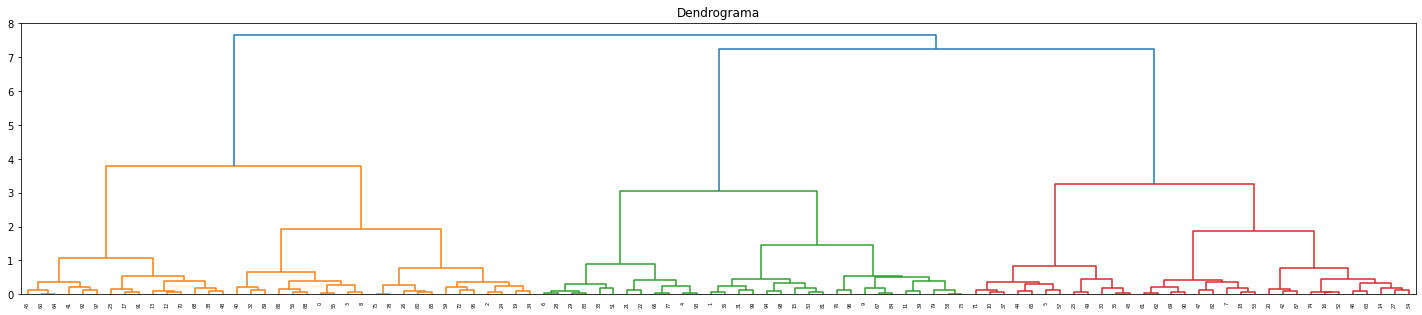

In [20]:
#Graficaremos el dendrograma para obtener el número del cluster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25,5))
plt.title("Dendrograma")
dendrograma=shc.dendrogram(shc.linkage(Xcircle, method = "ward"))

#Para determinar el número de cluster debemos ubicar la linea vertical que más larga de todas
#y que no tenga ningun cruce o sea cortada por otra.

De acuerdo a la imagen, el # de clúster óptimo (PARA Agrupamiento jerarquico) es 4

PRIMERA PREDICCIÓN AgglomerativeClustering.        LOS PARÁMETROS SON:
n_clusters=[2,6)               linkage='ward'                         affinity='euclidean'               memory=None 
connectivity=None              compute_full_tree='auto'               distance_threshold=None           compute_distances=False
----
En la primera imagen verá el original
Desde la segunda son predicciones. Las gráficas hacia la derecha aumentan el número de clústers
----



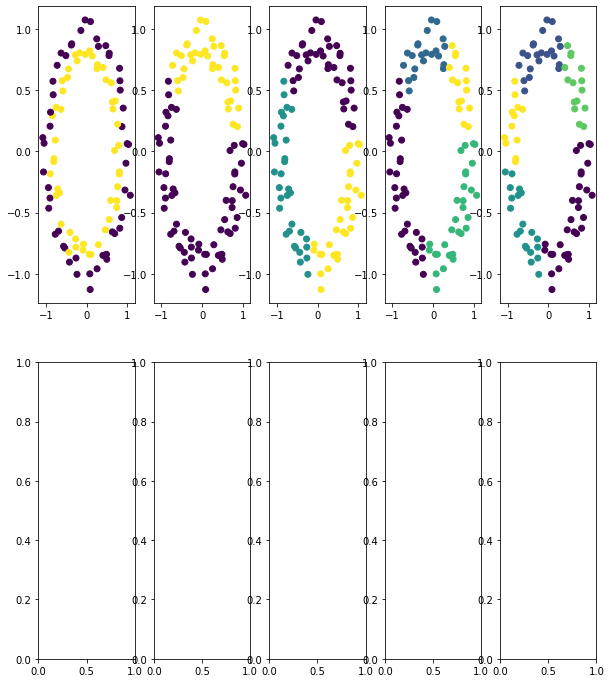

In [41]:
#PRIMERA PREDICCIÓN CON SISTEMA AGLOMERACION:

print("PRIMERA PREDICCIÓN AgglomerativeClustering.        LOS PARÁMETROS SON:")
print("n_clusters=[2,6)               linkage='ward'                         affinity='euclidean'               memory=None ")
print("connectivity=None              compute_full_tree='auto'               distance_threshold=None           compute_distances=False")
print("----")
print("En la primera imagen verá el original")
print("Desde la segunda son predicciones. Las gráficas hacia la derecha aumentan el número de clústers")
print("----")
print("")


fig,axs = plt.subplots(2,5, figsize = (10,12))  #[i filas, j columnas]
axs[0][0].scatter(Xcircle[:,0],Xcircle[:,1],c = ycircle)

for i in range(2,6):
  algoritmo_agrupamiento=AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward",distance_threshold=None)
  ag_tcircle = algoritmo_agrupamiento.fit_predict(Xcircle)
  axs[0][i-1].scatter(Xcircle[:,0],Xcircle[:,1],c = ag_tcircle)


SEGUNDA PREDICCIÓN AgglomerativeClustering.        LOS PARÁMETROS SON:
n_clusters=[2,6)               affinity='euclidean'            memory=None                       connectivity=None  
compute_full_tree='auto'       linkage='ward'                  distance_threshold=None           compute_distances=False
----
En la primera imagen verá el original
Columnas:                [ euclidean ]   [   l1   ]    [   l2   ] [   manhattan   ]    [   cosine   ]
2° row: linkage= complete
3° row: linkage= average
2° row: linkage= single



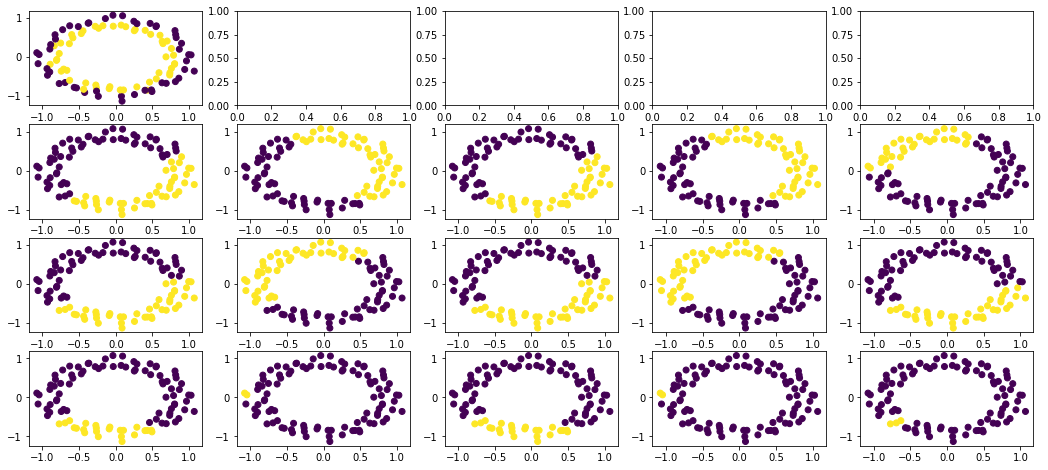

In [48]:
#SEGUNDA PREDICCIÓN CON SISTEMA AGLOMERACION:

print("SEGUNDA PREDICCIÓN AgglomerativeClustering.        LOS PARÁMETROS SON:")
print("n_clusters=[2,6)               affinity='euclidean'            memory=None                       connectivity=None  ")
print("compute_full_tree='auto'       linkage='ward'                  distance_threshold=None           compute_distances=False")
print("----")
print("En la primera imagen verá el original")
print("Columnas:                [ euclidean ]   [   l1   ]    [   l2   ] [   manhattan   ]    [   cosine   ]")
print("2° row: linkage= complete")
print("3° row: linkage= average")
print("2° row: linkage= single")
print("")


list_linkage=["complete", "average", "single"]
list_affinity=["euclidean","l1", "l2", "manhattan", "cosine"]

fig,axs = plt.subplots(4,5, figsize = (18,8))  #[i filas, j columnas]
axs[0][0].scatter(Xcircle[:,0],Xcircle[:,1],c = ycircle)

for i in range(len(list_linkage)):
  for j in range(len(list_affinity)):
    algoritmo_agrupamiento=AgglomerativeClustering(n_clusters=2, affinity=list_affinity[j], linkage=list_linkage[i])
    ag_tcircle = algoritmo_agrupamiento.fit_predict(Xcircle)
    axs[i+1][j].scatter(Xcircle[:,0],Xcircle[:,1],c = ag_tcircle)



**DBSCAN**

In [49]:
#Class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

PRIMERA PREDICCION DBSCAN.        LOS PARÁMETROS SON:
eps=[0.1,1)               min_samples=[0,10)            metric=euclidean
----
En la esquina de la izquierda superior verá el original
Cada fila muestra el aumento de eps en 0.1
Las gráficas hacia la derecha aumentan el número de min_samples en 1 unidad
----



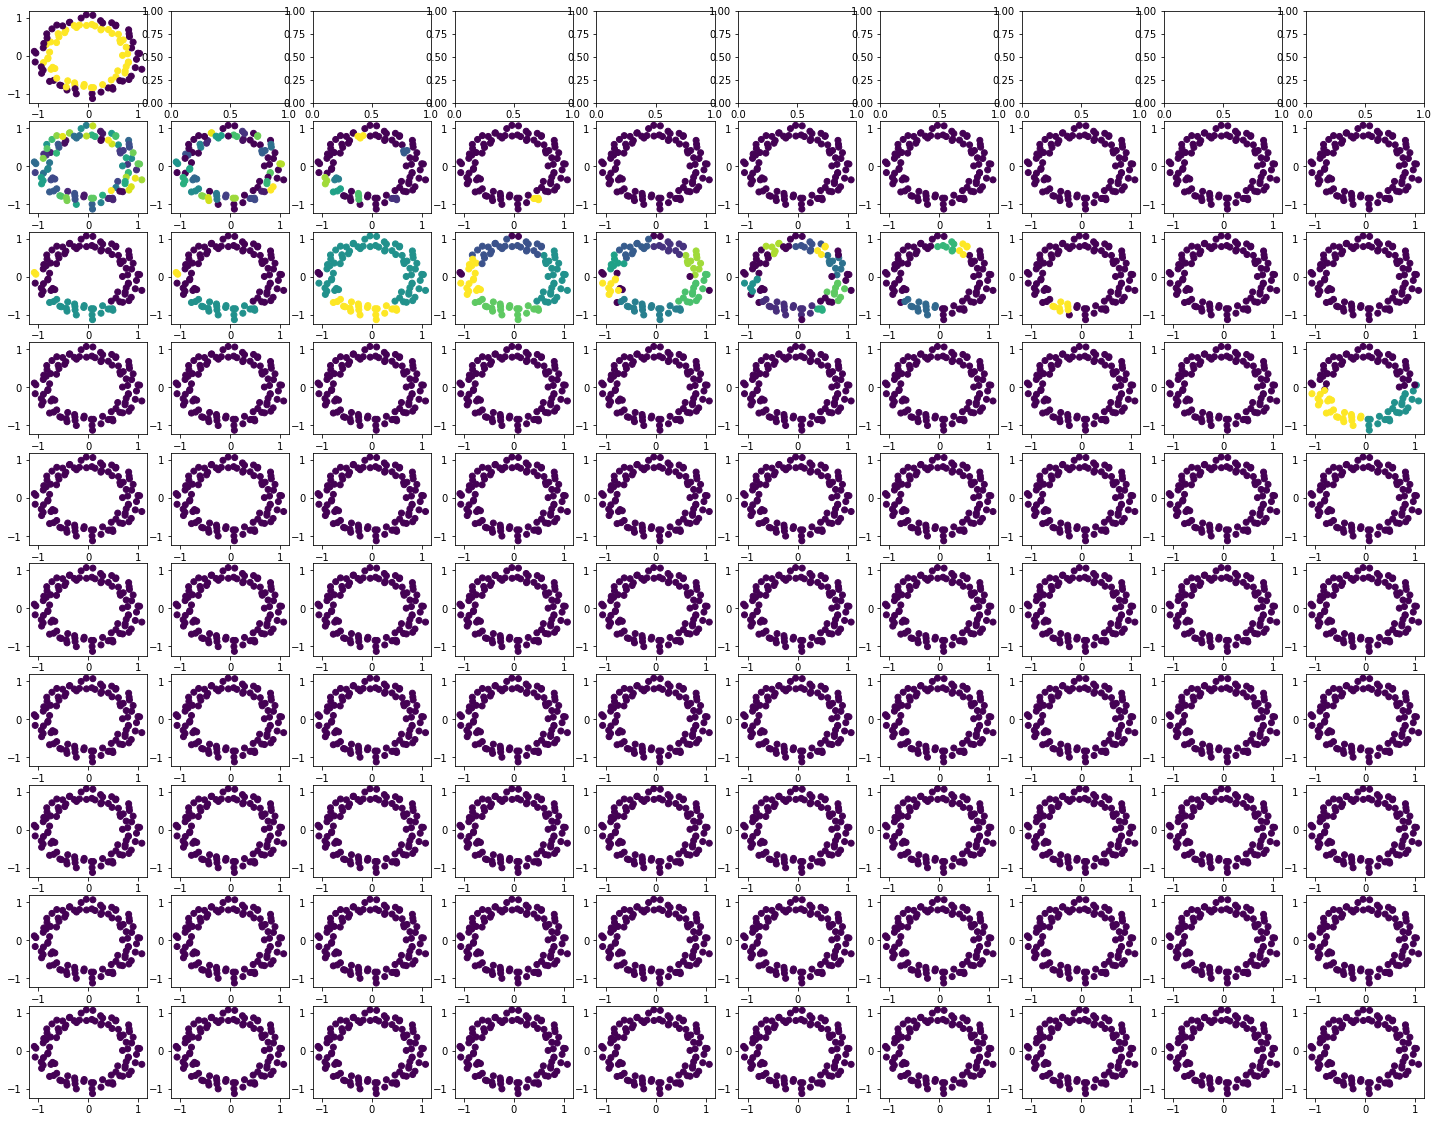

In [64]:
#PRIMERA PREDICCION DBSCAN
print("PRIMERA PREDICCION DBSCAN.        LOS PARÁMETROS SON:")
print("eps=[0.1,1)               min_samples=[0,10)            metric=euclidean")
print("----")
print("En la esquina de la izquierda superior verá el original")
print("Cada fila muestra el aumento de eps en 0.1")
print("Las gráficas hacia la derecha aumentan el número de min_samples en 1 unidad")
print("----")
print("")

list_eps=[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

fig,axs = plt.subplots(10,10, figsize = (25,20))  #[i filas, j columnas]
axs[0][0].scatter(Xcircle[:,0],Xcircle[:,1],c = ycircle)

for i in range(len(list_eps)):
  for j in range(1,11):
    dbcircle = DBSCAN(eps = list_eps[i], min_samples= j,metric="euclidean")
    db_tcircle = dbcircle.fit_predict(Xcircle)
    axs[i+1][j-1].scatter(Xcircle[:,0],Xcircle[:,1],c = db_tcircle)